Минибатчевый в вольфраме/питоне или стохастический в питоне. - клр.
Дз - train.csv - найти коффициенты регрессии (без моделей)

# Стохастический градиентный спуск

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

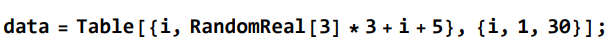

In [2]:
data = np.array([[i, np.random.rand() * 3 + i + 5] for i in range(1, 31)])
data

array([[ 1.        ,  8.57221983],
       [ 2.        ,  9.10761499],
       [ 3.        , 10.56103506],
       [ 4.        , 10.64108809],
       [ 5.        , 10.27311776],
       [ 6.        , 11.92695097],
       [ 7.        , 13.22012309],
       [ 8.        , 14.73096947],
       [ 9.        , 15.528361  ],
       [10.        , 17.27387789],
       [11.        , 16.10911681],
       [12.        , 19.60500108],
       [13.        , 20.9226523 ],
       [14.        , 20.73094418],
       [15.        , 20.55481612],
       [16.        , 22.37086771],
       [17.        , 22.37855528],
       [18.        , 25.29967236],
       [19.        , 25.8198592 ],
       [20.        , 26.79234377],
       [21.        , 26.1828667 ],
       [22.        , 29.24580563],
       [23.        , 28.00252736],
       [24.        , 31.12466622],
       [25.        , 31.41584341],
       [26.        , 33.9963968 ],
       [27.        , 33.6158582 ],
       [28.        , 35.89607895],
       [29.        ,

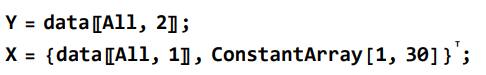

In [3]:
Y = data[:, 1]
Y

array([ 8.57221983,  9.10761499, 10.56103506, 10.64108809, 10.27311776,
       11.92695097, 13.22012309, 14.73096947, 15.528361  , 17.27387789,
       16.10911681, 19.60500108, 20.9226523 , 20.73094418, 20.55481612,
       22.37086771, 22.37855528, 25.29967236, 25.8198592 , 26.79234377,
       26.1828667 , 29.24580563, 28.00252736, 31.12466622, 31.41584341,
       33.9963968 , 33.6158582 , 35.89607895, 36.36921151, 36.70516935])

In [4]:
X = np.column_stack((data[:, 0], np.ones(len(data)))) #первый столбец из data, второй - единичный вектор длины len(data)
X

array([[ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.],
       [20.,  1.],
       [21.,  1.],
       [22.,  1.],
       [23.,  1.],
       [24.,  1.],
       [25.,  1.],
       [26.,  1.],
       [27.,  1.],
       [28.,  1.],
       [29.,  1.],
       [30.,  1.]])

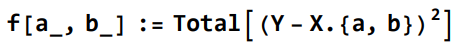

In [5]:
def f(a, b):
    return np.sum((Y - np.dot(X, [a, b]))**2) 

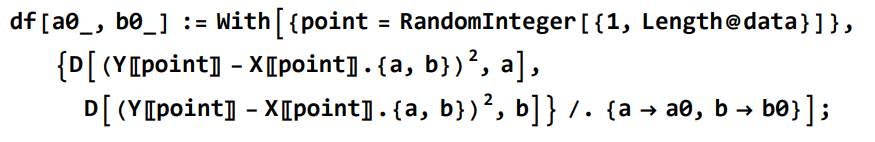

In [6]:
MNK = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [7]:
def df(a, b):
    point = np.random.randint(1, len(data))
    grad_a = -2 * X[point, 0] * (Y[point] - np.dot(X[point], [a, b]))
    grad_b = -2 * (Y[point] - np.dot(X[point], [a, b]))
    return np.array([grad_a, grad_b])

In [8]:
w0 = np.array([0, 0])
lamda = 0.00001
res = [w0]

In [10]:
while True:
    gradient = df(*w0)
    w1 = w0 - lamda * gradient
    res.append(w1)
    
    if np.linalg.norm(w1 - w0) < 0.0001:
        break
    
    w0 = w1
    
print("МНК:", MNK)
print("SGB:", w0)

МНК: [1.00784551 6.54418165]
SGB: [1.22606526 0.07038499]


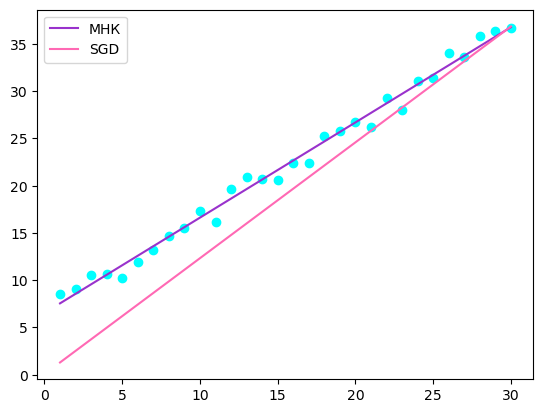

In [11]:
plt.scatter(data[:, 0], data[:, 1], c='cyan')
plt.plot(data[:, 0], MNK[1] + MNK[0] * data[:, 0], c='darkorchid', label='МНК')
plt.plot(data[:, 0], w0[1] + w0[0] * data[:, 0], c='hotpink', label='SGD')
plt.legend()
plt.show()